# Exploratory Data Analysis Project 

---


Sidney Simner


 **This data exploration with utilize the Titanic dataset**
 
Data may be found on Kaggle (use the train file): 
 https://www.kaggle.com/c/titanic/data?select=test.csv

##Data Collection and Preparation 

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#import the data
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see this data contains 12 columns of data all pertaining to characteristics of a passanger on the titanic

In [4]:
#shows how many rows of data, or passangers, there are
titanic.PassengerId.count()

891

The above count shows there are 891 passangers for whom data is accounted for. Outside research tell us there were actually 2435 passangers on the ship (excluding crew). This means this data set is incomplete and may be skewed to reflect more data on high class status passangers as they be better accounted for 

In [5]:
#shows if any coulmns are missing data values
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

the above counts shows that all passangers have an ID, survival status, name, passanger class, sex, sibling and parantage status, ticket number, and fare accounted for. The age, cabin, and port of embarkment columns are missing some values which may pose an issue for statistics and should be noted for later reference.


Variable discriptions are provided below


Source: data dictionary https://www.kaggle.com/c/titanic/data


---


**VARIABLE DESCRIPTIONS:**

Survived = Survival (target, or dependent, variable) (0 = No; 1 = Yes)

Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name = Name

Sex = Sex

Age = Age

Sibsp = Number of Siblings/Spouses Aboard

Parch = Number of Parents/Children Aboard

Ticket = Ticket Number

Fare = Passenger Fare

Cabin = Cabin

Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


---


**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5



Age, Cabin, and Embarkment were previously identified to be missing values. The extensiveness of these issues is explored below.

In [6]:
#counting the number of null values 
print("Age null values:", titanic['Age'].isnull().sum())
print("Cabin null values:", titanic['Cabin'].isnull().sum())
print("Embarked null values:", titanic['Embarked'].isnull().sum())


Age null values: 177
Cabin null values: 687
Embarked null values: 2


Considering the Cabin variable is missing the majority of its values, it should be removed

In [7]:
#delete the cabin column
del titanic["Cabin"]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Considering how many rows there are and only 2 Embarked values missing, it should not affect the statistics much. However, to make the data for Age useful all null values should be filled.

I will be filling the missing age values with the average age of all passengers. Since there are so few missing port values, I will be leaving them Null


In [8]:
#fill missing Embarked values with 'N' # no utilizing this but leaving it as an option 
# titanic1 = titanic.Embarked.fillna('N')
# titanic.Embarked = titanic1

#calculate mean age
meanAge = round(titanic['Age'].mean(), 2)

#fill missing age values with mean age
titanic2 = titanic.Age.fillna(meanAge)
titanic.Age = titanic2

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Considering the Ticket column doesnt provide much useful or relevent data, I will remove it

In [9]:
#delete the ticket column
del titanic["Ticket"]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [10]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

The data is now ready for analysis!

## Describe the general populaiton on the Titanic


In [11]:
#summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This shows data for 891 passangers. 

On average, 38% of the passangers survived. The average class of passanger with data collected is below middle class (>2) which indicates survival rates are skewed in the direction of lower class data. the average age was almost 30 years old and the average ticket cost was 32 Pounds.


## Describe each gender group


What was the gender divide in the population?

Sex
female    314
male      577
Name: PassengerId, dtype: int64 



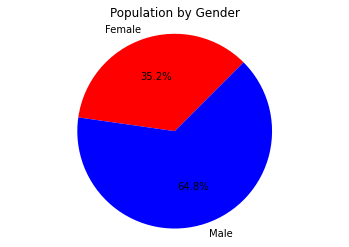

In [12]:
sex_count = titanic.groupby('Sex')['PassengerId'].count()
print(sex_count, "\n")

#graph in pie chart 
plt.pie(sex_count, labels=['Female', 'Male'], autopct='%.1f%%', startangle=45, colors =['r','b'])
plt.title('Population by Gender')
plt.axis('equal')
plt.show()

What was the average age within each gender?

In [13]:
#average
print("Average age in each gender\n", titanic.groupby('Sex')['Age'].mean())

#maximum age
print("\n Maximum age in each gender\n", titanic.groupby('Sex')['Age'].max())

#minimum age
print("\n Minimum age in each gender\n", titanic.groupby('Sex')['Age'].min())

Average age in each gender
 Sex
female    28.216879
male      30.506014
Name: Age, dtype: float64

 Maximum age in each gender
 Sex
female    63.0
male      80.0
Name: Age, dtype: float64

 Minimum age in each gender
 Sex
female    0.75
male      0.42
Name: Age, dtype: float64


Survival rates within each gender

In [14]:
#counting survived passengers in each gender
sex_survived = titanic.groupby('Sex')['Survived'].sum()
print(sex_survived)

Sex
female    233
male      109
Name: Survived, dtype: int64


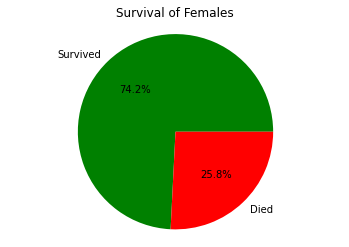

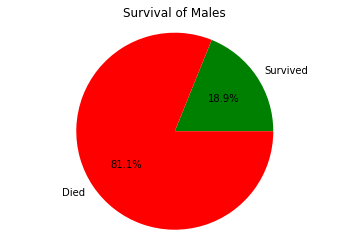

In [15]:
#list of [survived, died] in each gender
f_survived = [sex_survived[0], (sex_count[0]-sex_survived[0])]
m_survived = [sex_survived[1], sex_count[1]-sex_survived[1]]

#graph in pie chart 
plt.pie(f_survived, labels=['Survived', 'Died'], autopct='%.1f%%', colors =['g','r'])
plt.title('Survival of Females')
plt.axis('equal')
plt.show()

plt.pie(m_survived, labels=['Survived', 'Died'], autopct='%.1f%%', colors =['g','r'])
plt.title('Survival of Males')
plt.axis('equal')
plt.show()

###How did males compare to females in survival rate for each class?

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

 Number of survivors in each class, by gender:


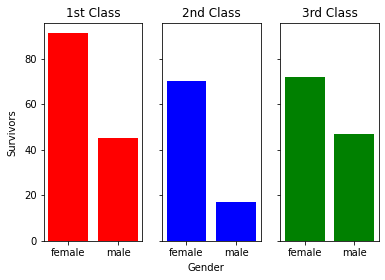

In [16]:
#count survived people b class and gender
survived_gender = titanic.groupby(by=["Pclass", "Sex"])["Survived"].sum()

print(survived_gender)
print("\n Number of survivors in each class, by gender:")

genders = ["female", "male"]

#plot the gender comparison in each class
myFig, ax = plt.subplots(1, 3, sharey=True, sharex=True, squeeze=False)

myFig.text(0.5, 0.02, 'Gender', ha='center')
myFig.text(0.04, 0.5, 'Survivors', va='center', rotation='vertical')

ax[0, 0].bar(genders, survived_gender[:2], color ='r')
ax[0, 1].bar(genders, survived_gender[2:4], color ='b')
ax[0, 2].bar(genders, survived_gender[4:6], color = 'g')

ax[0, 0].title.set_text('1st Class')
ax[0, 1].title.set_text('2nd Class')
ax[0, 2].title.set_text('3rd Class')

plt.show()


This shows women survived at far greater rates than men, independent of socioeconomic group 

## What was the socioeconomic makeup of the passengers? What were the statistics assosiated with each group? 

###Is this data skewed? Does the rate of sales of each class of ticket match historical data?

Historically, 24% of passangers were first class, 21% were second class, and 55% were third class. 

In [17]:
class_count = titanic.groupby(by=["Pclass"])["PassengerId"].count()
print(class_count / 891)

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64


The percentages match! this data set is exactly representitive of the class makeup of historical data

###Class survival

Historical data shows the survival rate for first class passengers was 44.68%, for second class 40.46%, for third class 36.32%. How does this compare to this data set?

In [18]:
#number of total survived passengers in each Class
survived_class = titanic.groupby('Pclass')['Survived'].sum()
print(survived_class)

#number of total passengers in each class
population = titanic.groupby('Pclass')['PassengerId'].count()
print(population)

#percent of each socioeconomic group that survived 
print("\nSurvival rates in each class (all ages and genders)")
print(survived_class/population * 100)


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

Survival rates in each class (all ages and genders)
Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


This shows first class passangers survived at far better rates than those in lower classes. In comparison to historical data, first class is reported to have a better survival rate and third class a worse survival rate. 

### Class by Age 

What was the average age of each class? 

In [19]:
age_class_avg = titanic.groupby('Pclass')['Age'].mean()
print(age_class_avg)

Pclass
1    37.048241
2    29.867011
3    26.403503
Name: Age, dtype: float64


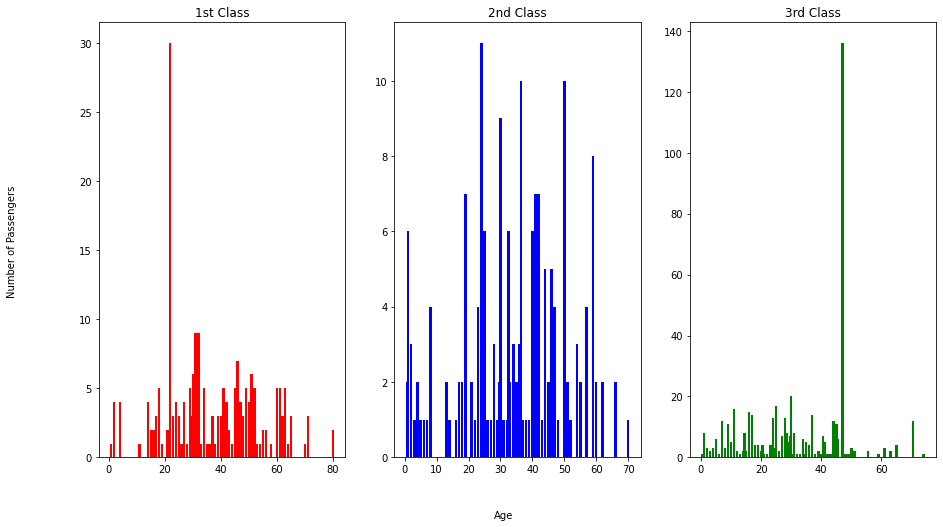

In [20]:
#plot age distribution 

#first class age distribution
class1 = titanic[titanic['Pclass'] == 1]
age_class1 = class1.groupby('Age')['PassengerId'].count()

#second class age distribution
class2 = titanic[titanic['Pclass'] == 2]
age_class2 = class2.groupby('Age')['PassengerId'].count()

#third class age distribution
class3 = titanic[titanic['Pclass'] == 3]
age_class3 = class3.groupby('Age')['PassengerId'].count()

#create plot
myFig, myAxes = plt.subplots(1, 3, squeeze=False)
#resize
myFig.set_size_inches(15, 8)
#Axes
myFig.text(0.5, 0.02, 'Age', ha='center')
myFig.text(0.04, 0.5, 'Number of Passengers', va='center', rotation='vertical')

myAxes[0, 0].bar(class1['Age'].unique(), age_class1, color = 'r')
myAxes[0, 1].bar(class2['Age'].unique(), age_class2, color = 'b')
myAxes[0, 2].bar(class3['Age'].unique(), age_class3, color = 'g')

myAxes[0, 0].title.set_text('1st Class')
myAxes[0, 1].title.set_text('2nd Class')
myAxes[0, 2].title.set_text('3rd Class')

plt.show()

Which class had the highest amount of children?

In [21]:
#find all the children in the dataset
children = titanic[titanic["Age"] < 18]

#group the children by class 
children_class = children.groupby('Pclass')['PassengerId'].count()

children_class

Pclass
1    12
2    23
3    78
Name: PassengerId, dtype: int64

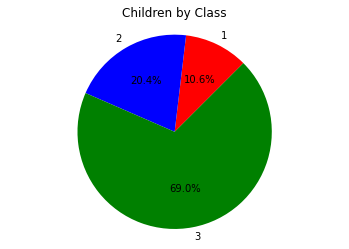

In [22]:
#graph in pie chart 
plt.pie(children_class, labels=[1, 2, 3], autopct='%.1f%%', startangle=45, colors = ['r', 'b', 'g'])
plt.title('Children by Class')
plt.axis('equal')
plt.show()

Did children have a better survival rate dependent on class?

In [23]:
children_class_lived = children.groupby('Pclass')['Survived'].sum()
print(children_class_lived)

print(children_class_lived / children_class)

Pclass
1    11
2    21
3    29
Name: Survived, dtype: int64
Pclass
1    0.916667
2    0.913043
3    0.371795
dtype: float64


## How was ticket fare determined?

Was ticket price affected by age of passanger?


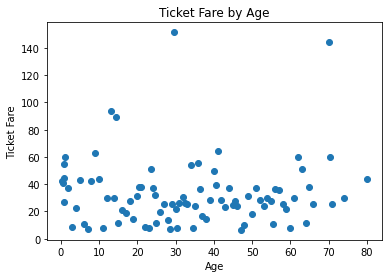

In [24]:
#get average ticket price per age 
fare_age = titanic.groupby('Age')['Fare'].mean()

#find every age represented 
ages = titanic["Age"].unique()

plt.scatter(ages, fare_age, marker='o')

plt.xlabel('Age')
plt.ylabel('Ticket Fare')
plt.title('Ticket Fare by Age')

plt.show()

a horizontal trend to the data shows that ticket price was not dependent on age, more by class or ticket type 

Was ticket fare consistant within each class?


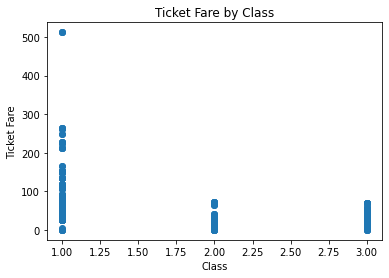

In [25]:
#get average ticket price per class 
fare_class = titanic['Fare']

#find every age represented 
classes = titanic["Pclass"]

plt.scatter(classes, fare_class, marker='o')

plt.xlabel('Class')
plt.ylabel('Ticket Fare')
plt.title('Ticket Fare by Class')

plt.show()

In [26]:
#calculate the average fare for each class ticket 
class_fare = titanic.groupby(by=["Pclass"])["Fare"].mean()
print(class_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


### Was ticket fare affected by port?

In [27]:
#calculate the average fare for each class ticket at each port 
port_fare = titanic.groupby(by=["Embarked", "Pclass"])["Fare"].mean()
print(port_fare)

Embarked  Pclass
C         1         104.718529
          2          25.358335
          3          11.214083
Q         1          90.000000
          2          12.350000
          3          11.183393
S         1          70.364862
          2          20.327439
          3          14.644083
Name: Fare, dtype: float64


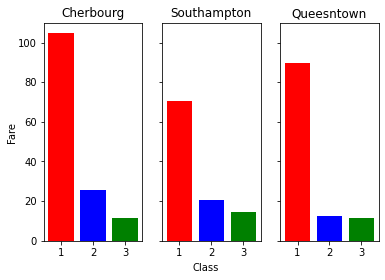

In [28]:
pclass = [1, 2, 3]

fig, ax = plt.subplots(1, 3, sharey=True, sharex=True, squeeze=False)

fig.text(0.5, 0.02, 'Class', ha='center')
fig.text(0.04, 0.5, 'Fare', va='center', rotation='vertical')

ax[0, 0].bar(pclass, port_fare[:3], color =['r', 'b', 'g'])
ax[0, 1].bar(pclass, port_fare[6:9], color =['r', 'b', 'g'])
ax[0, 2].bar(pclass, port_fare[3:6], color =['r', 'b', 'g'])

ax[0, 0].title.set_text('Cherbourg')
ax[0, 1].title.set_text('Southampton')
ax[0, 2].title.set_text('Queesntown')

plt.show()